In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


In [2]:
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


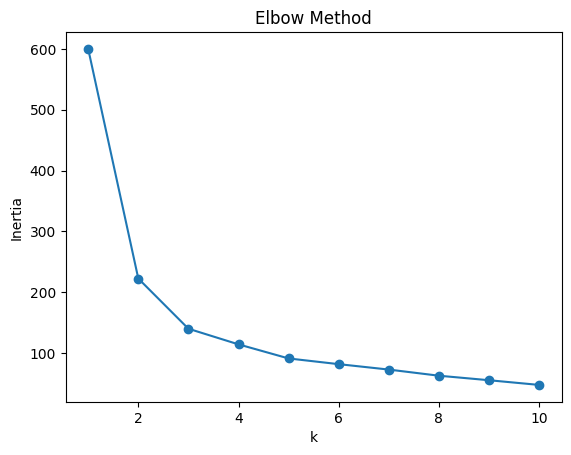

In [4]:
inertia = []
K_range = range(1, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)
plt.plot(K_range, inertia, marker='o')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [5]:
k_best = 3
kmeans = KMeans(n_clusters=k_best, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)
score_kmeans = silhouette_score(X_scaled, labels_kmeans)
print("KMeans Silhouette Score:", round(score_kmeans, 3))

KMeans Silhouette Score: 0.48


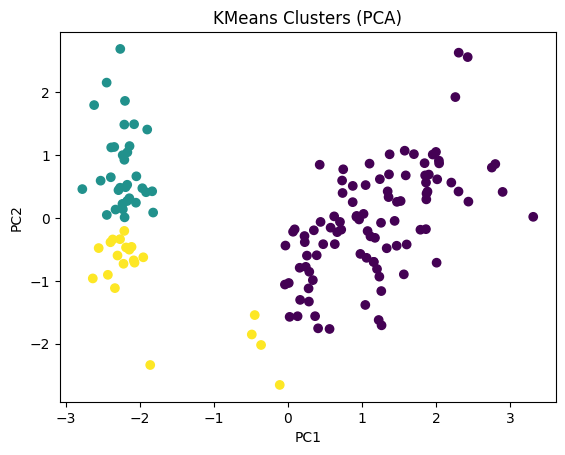

In [6]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans, cmap='viridis')
plt.title('KMeans Clusters (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [7]:
n_samples = X_scaled.shape[0]
n_runs = 10
base_labels = []
for i in range(n_runs):
  k = np.random.choice([2, 3, 4])
  km = KMeans(n_clusters=k, random_state=i)
  labels = km.fit_predict(X_scaled)
  base_labels.append(labels)

In [8]:
co_matrix = np.zeros((n_samples, n_samples))
for labels in base_labels:
  for i in range(n_samples):
    for j in range(n_samples):
      if labels[i] == labels[j]:
        co_matrix[i, j] += 1
co_matrix /= n_runs

In [10]:
spectral = SpectralClustering(n_clusters=k_best, affinity='precomputed', random_state=42)
labels_ensemble = spectral.fit_predict(co_matrix)
score_ensemble = silhouette_score(X_scaled, labels_ensemble)
print("Ensemble Silhouette Score:", round(score_ensemble, 3))

Ensemble Silhouette Score: 0.463


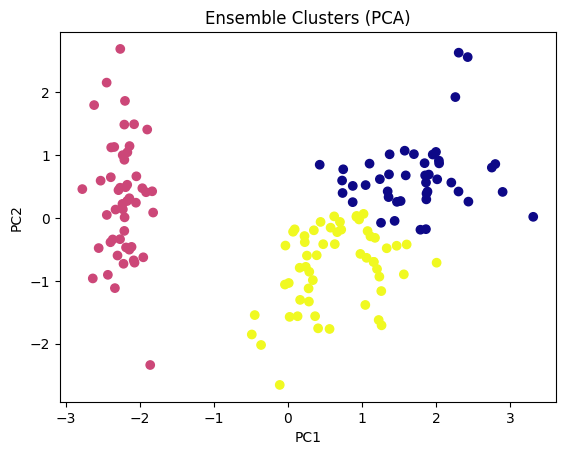

In [11]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_ensemble, cmap='plasma')
plt.title('Ensemble Clusters (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

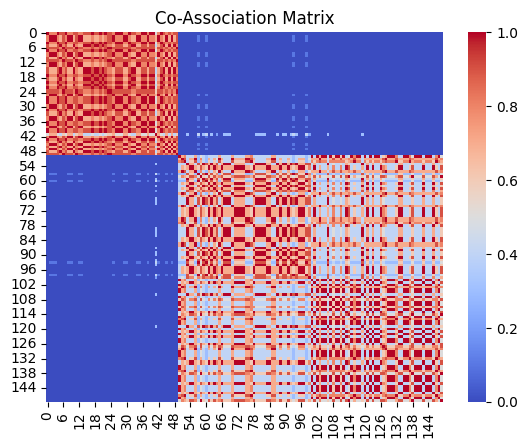

In [12]:
import seaborn as sns
sns.heatmap(co_matrix, cmap='coolwarm')
plt.title('Co-Association Matrix')
plt.show()